# Visualising data

The de facto standard plotting and visualisation library for Python is [matplotlib](https://matplotlib.org/). It is incredibly versatile and it is worth getting to know. However, its API can be a little complex and can require a fair bit of code to get plot looking how you want.

There are libraries which build on top of matplotlib to provide a nice interface, while still allowing you to peek beneath the surface to access the full power of matplotlib. We'll look at two in this chapter, firstly the in-built pandas plotting tools and then the popular [seaborn](https://seaborn.pydata.org) library.

Let's start with the data from the earlier chapter with the rainfall from British cities:

In [1]:
import pandas as pd
rain = pd.read_csv("https://milliams.com/courses/data_analysis_python/rain.csv")

For basic plotting, pandas provides very easy tools for quickly visualising your data. Any DataFrame or Series can be plotted with the `.plot()` method:

<Axes: >

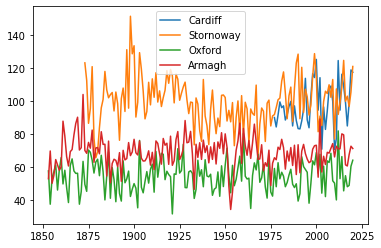

In [2]:
rain.plot()

One of the first things I do every time I read in a new set of data is to plot it. This helps to spot the overall shape of the data, spot any missing or erroneous points and get a handle on how to proceed with the analysis.

### Exercise 1

- Read in the Met Office data from the ["Reading from file"](Reading%20from%20file.ipynb#Exercise) chapter's exercise.
- Draw a line plot of the January temperature over time.

[<small>answer</small>](answer_visualisation_pandas.ipynb)

## seaborn

The built-in pandas plotting is really useful because it is always available at your fingertips and it smooths over some of the tricky parts of matplotlib, but it will only take you so far.

seaborn is a third-party library which provides an easy-to-use interface for plotting tabular data which integrates with pandas really well. By convention it is imported as `sns`:

In [3]:
import seaborn as sns

seaborn comes with its own style which affects the colours, grid, fonts etc. You don't have to use the seaborn theme but it generally looks nicer than the matplotlib defaults:

In [4]:
sns.set_theme()

Note, in versions before seaborn 0.11 this function was called `sns.set()`. If you are running an older version you will need to use that form.

Once you've done this, you're all ready to get started. So let's grab some data and start thinking about what we might want to plot. We'll use the "tips" data set from before as it's got some interesting features in the data for us to explore:

In [5]:
tips = pd.read_csv("https://milliams.com/courses/data_analysis_python/tips.csv")

Before diving in, it's worth thinking about what kinds of plots we can do and what kind of information we want to show. When communicating your results to an audience you should consider the story you are trying to tell. Not story in the "fiction" sense but story in the "narrative" sense. Visualisations should be used to discover and back up conclusions and so the choice of what you show, as well as the choice of what you don't is important.

There are three major kinds of visualisation that you may want to use:

<dl>
<dt>Plotting <em>relationships between</em> variables in the data set</dt>
<dd>This is showing how a change in one variable affects another variable. For example it could be scatter plot of how age and weight are related or a line plot of the change in temperature over time.</dd>
<dt>Plotting the <em>distribution</em> of variables</dt>
<dd>This is usually about <em>how many</em> of each value you have and how they are spread out. For example it could be a histogram of the spread of marks for a class of students or the ages of people in a country.</dd>
<dt>Seeing how the data varies by <em>category</em></dt>
<dd>Categories in your data can be used in conjunction with both the methods described above but sometimes splitting your data by category and looking at each separately is a good choice. For example it could be a bar chart of how much each country spent on foreign aid.</dd>
</dl>

### Plotting relationships

We'll start with looking at how we can visualise how data are related to each other. seaborn offers a generic interface for doing this called `relplot()`. You can find more information in the seaborn [documentation for the `relplot()` function](https://seaborn.pydata.org/generated/seaborn.relplot.html) and the more general page on [visualising statistical relationships](https://seaborn.pydata.org/tutorial/relational.html).

You use `relplot()` by passing it the DataFrame you want to explore and the two dimensions of the table that you want to compare. This only makes sense for dimensions that are numerical (e.g. height, weight, price, etc.) and not for "categorical" data like "day of the week" or "species". The numerical variables in our data are `total_bill`, `tip` and `size`.

The `data` argument should be the entire DataFrame and the `x` and `y` arguments should be the names of the columns to plot. So, to plot the values of tips against the total bill, we do:

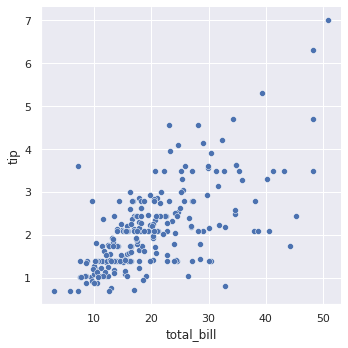

In [6]:
sns.relplot(data=tips, x="total_bill", y="tip")

By default it creates a scatter plot and uses the column names as axis labels. To set the axis labels to something more useful, you can call `set_axis_labels()` on the object returned by `relplot()`:

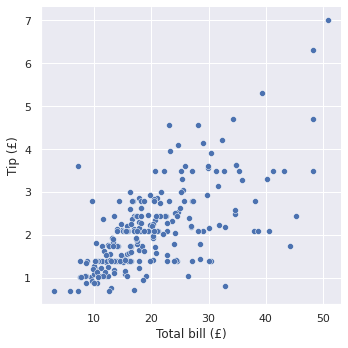

In [7]:
g = sns.relplot(data=tips, x="total_bill", y="tip")
g.set_axis_labels("Total bill (£)", "Tip (£)")

In the example above we chose two variables from our table of data and used them as a visual dimension in our plot. We wanted the total bill to be represented as the distance from left-to-right and the tip amount to be represented as the distance from bottom-to-top.

seaborn provides a bunch of different dimensions onto which you can map your data:

- `x=`: see above
- `y=`: see above
- `hue=`: assign a different colour depending on the value. If the variable is numerical then it will vary the colour smoothly, if it is categorical then it will assign discrete colours to each category.
- `size=`: vary the size of the marker depending on the value
- `style=`: use a different marker type (e.g. ▲, ◆, ●, ◼) for the variable. Only makes sense for discrete variables.
- `row=` and `col=`: for discrete variables, draw a separate subplot along a row or column for each category

If you have multiple dimensions to visualise, you can therefore plot up to 7 dimensional data. Here's an example using 5 dimensions for different variables:

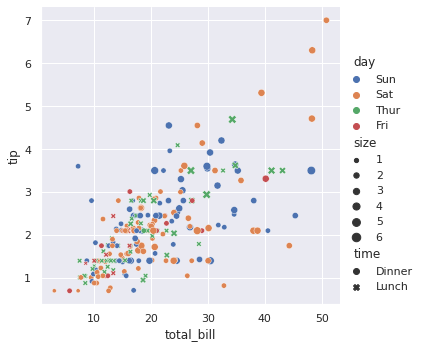

In [8]:
sns.relplot(data=tips, x="total_bill", y="tip", hue="day", size="size", style="time")

But this very quickly gets very hard to interpret and understand. It is instead recommended to keep the number of variables plotted at once small and instead use the plotting dimensions redundantly, i.e. using both the marker style and the hue for the same data variable. This can make the plot more accessible when printed in black-and-white or when viewed by someone with colour-blindness:

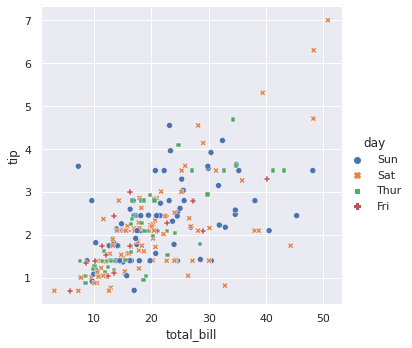

In [9]:
sns.relplot(data=tips, x="total_bill", y="tip", hue="day", style="day")

### Exercise 2

- Using the `bill_per_person` and `percent_tip` columns from the previous chapter, plot the relationship between the percentage tip, and the bill per-person.
- Set the colour of the data points to be based on the day of the week.

[<small>answer</small>](answer_visualisation_relplot.ipynb)

### Plotting distributions

Rather than looking at how one variable relates to another, sometimes you want to see how the data points in one particular dimension are arrayed. As with the x and y axes for `relplot`, this only makes sense for variables that are numerical.

For example, we might want to get an overview of what kind of values we have for the total bill. We could summarise this down to a few single variables like `tips["total_bill"].mean()` and `tips["total_bill"].std()` but this loses a lot of information.

seaborn provides a function for investigating the distribution of a variable called [`displot`](https://seaborn.pydata.org/generated/seaborn.displot.html) which works in a similar way to `relplot`. You pass the data frame you want to visualise and then start specifying the dimensions that you want to show.

Note: `displot` was added in version 0.11 of seaborn. If you are on an earlier version then you will not have it available. In this case you should upgrade your version of seaborn to at least 0.11. If you cannot upgrade then you can make histograms using the [`distplot`](https://seaborn.pydata.org/archive/0.10/generated/seaborn.distplot.html) function (note the extra `t`), though it lacks some features.

For example, to show a histogram of the total bill, you do the following:

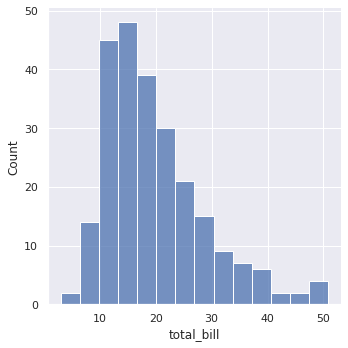

In [10]:
sns.displot(data=tips, x="total_bill")

As with `relplot` we can ask seaborn to show additional dimensions of our data with the following arguments (which have the same meaning as in `relplot`): `x`, `y`, `hue`, `row` and `col`.

So, to compare the distribution of total bills between lunch time and dinner time, arraying them by column, you can do:

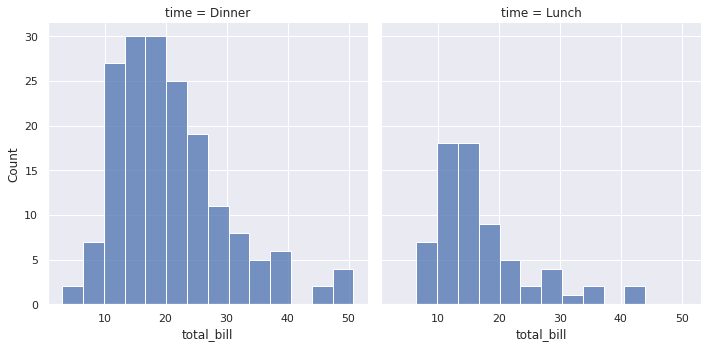

In [11]:
sns.displot(data=tips, x="total_bill", col="time")

Since `displot` shows the *count* of the values in each bin by default, the first thing that you would conclude is that there are more dinner data than lunch. If this is the story you are exploring then it's all good. However, we want to show how the *distribution* varies from lunch to dinner. To have it ignore the absolute values of the counts and to instead normalise the counts within each category, you can set `common_norm=False` which allows each subset to normalise individually:

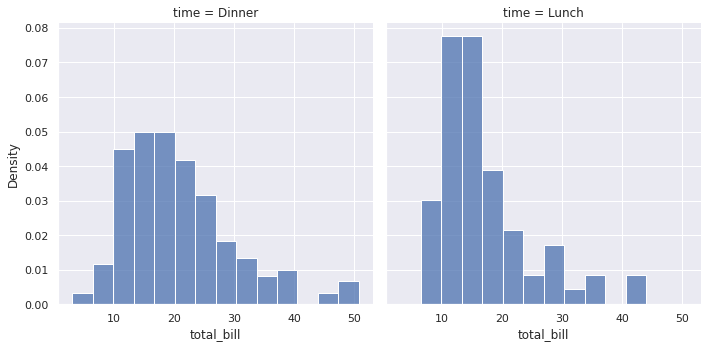

In [12]:
sns.displot(data=tips, x="total_bill", col="time", stat="density", common_norm=False)

We can now see that the lunch bills have a higher single peak which suggests that it has a tighter distribution. However, plotting them side-by-side makes it difficult to compare the point at which the peak happens in each data set. Do they align or are they shifted?

To solve this, we can plot the two overlaid by using the `hue` semantic instead of the `col`:

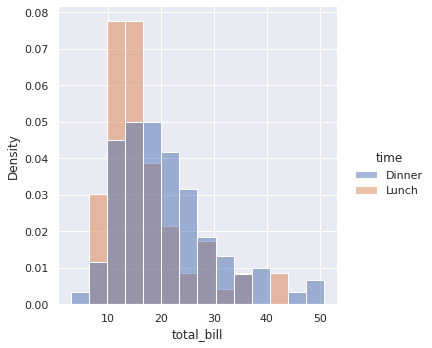

In [13]:
sns.displot(data=tips, x="total_bill", hue="time", stat="density", common_norm=False)

We can now see that the lunch orders peak at a similar value to dinner but are shifted slightly to the left. They also have a tighter distribution.

To simplify the view down further, you can smooth the bins by applying a "kernel density estimation" which allows you to turn it into a line graph:

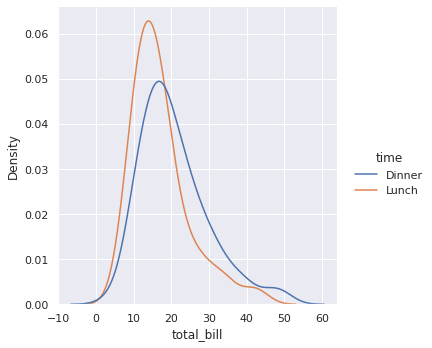

In [14]:
sns.displot(data=tips, x="total_bill", hue="time", kind="kde", common_norm=False)

Now we can directly see that the lunch peak is tighter and peaks slightly lower.

### Exercise 3

Investigate how the time of day affects how much each person spends *on average*.

[<small>answer</small>](answer_visualisation_displot.ipynb)

### Plotting categorical data

When you have categorical variables in your data, you usually want to compare between the categories. seaborn's [`catplot`](https://seaborn.pydata.org/generated/seaborn.catplot.html) and the [associated tutorial page](https://seaborn.pydata.org/tutorial/categorical.html) are the solution here.

The categorical variables in our data set are `day` and `time`. If we wanted to see how the total bill depended on the day of the week, we could do the following:

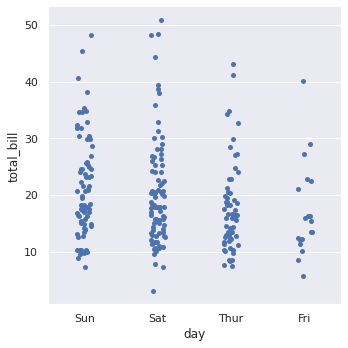

In [15]:
sns.catplot(data=tips, x="day", y="total_bill")

While the day of week is a categorical variable, it also has an understood common ordering to it where we would expect the days to presented in that order. We can specify the ordering with the `order` parameter:

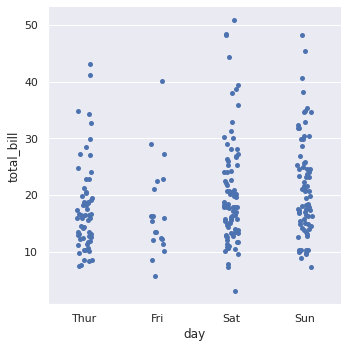

In [16]:
sns.catplot(data=tips, x="day", y="total_bill", order=["Thur", "Fri", "Sat", "Sun"])

This is showing that it seems like Thursday and Friday have a slightly lower average that the other days. The default "strip plot" is good because it doesn't summarise the data too much, but when looking for averages something like a box plot might be better. Pass the argument `kind="box"` to do this:

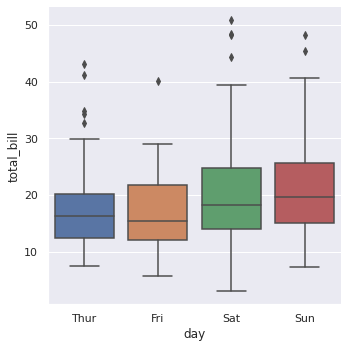

In [17]:
sns.catplot(data=tips, x="day", y="total_bill", order=["Thur", "Fri", "Sat", "Sun"], kind="box")

### Exercise 4

There seems to be a trend towards larger total bills at the weekend. Investigate whether this is due to a larger average spend per person or due to a larger average group size.

See if using `kind="violin"` instead of `"box"` presents your data any better.

[<small>answer</small>](answer_visualisation_catplot.ipynb)